In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('data/AirQuality.csv', sep=';', low_memory=False)
df=df.dropna(how='all', axis=1)
df.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [46]:
df.head(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"


In [47]:
df['CO(GT)'].unique()

array(['2,6', '2', '2,2', '1,6', '1,2', '1', '0,9', '0,6', '-200', '0,7',
       '1,1', '1,7', '1,5', '1,9', '2,9', '4,8', '6,9', '6,1', '3,9',
       '1,4', '0,8', '4,4', '3,1', '2,7', '2,1', '2,5', '2,8', '2,4',
       '3,7', '6,6', '3,5', '5,4', '3,2', '4,1', '3,6', '2,3', '4,2',
       '1,8', '3', '4,6', '5,9', '3,4', '5,5', '8,1', '5,8', '8', '6,5',
       '1,3', '5,3', '3,3', '4', '3,8', '5,1', '0,5', '4,3', '5', '7,6',
       '6,7', '5,7', '4,7', '4,5', '6,2', '0,4', '0,3', '5,2', '4,9',
       '6,3', '7,3', '6,4', '6', '5,6', '7,2', '0,2', '0,1', '7,5', '7',
       '7,7', '6,8', '8,4', '7,9', '9,5', '9,2', '8,7', '7,8', '10,2',
       '8,3', '8,6', '11,9', '11,5', '10,1', '9,4', '9,9', '7,4', '9,3',
       '9,1', '8,5', '1,0', '3,0', '5,0', '2,0', '-200,0', '4,0', '6,0',
       '7,1', nan], dtype=object)

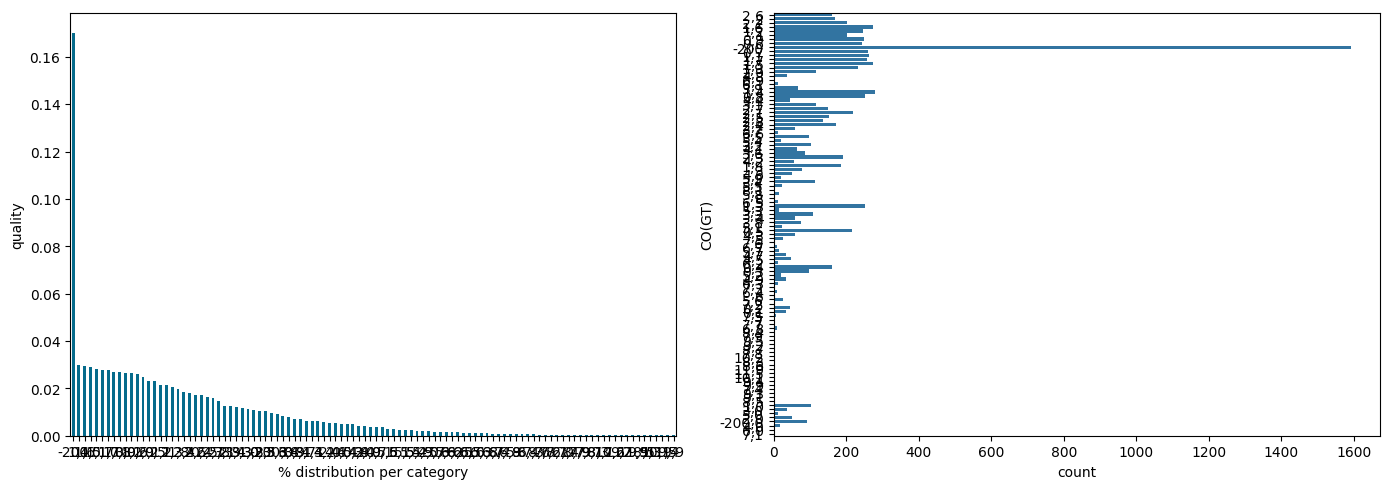

In [48]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
df['CO(GT)'].value_counts(normalize=True).plot.bar(rot=0, color='#066b8b')
plt.ylabel('quality')
plt.xlabel('% distribution per category')
plt.subplot(1, 2, 2)
sns.countplot(data=df, y='CO(GT)')
plt.tight_layout()
plt.show()



In [49]:
df_features = df.drop(columns='CO(GT)')

PT08.S1(CO)


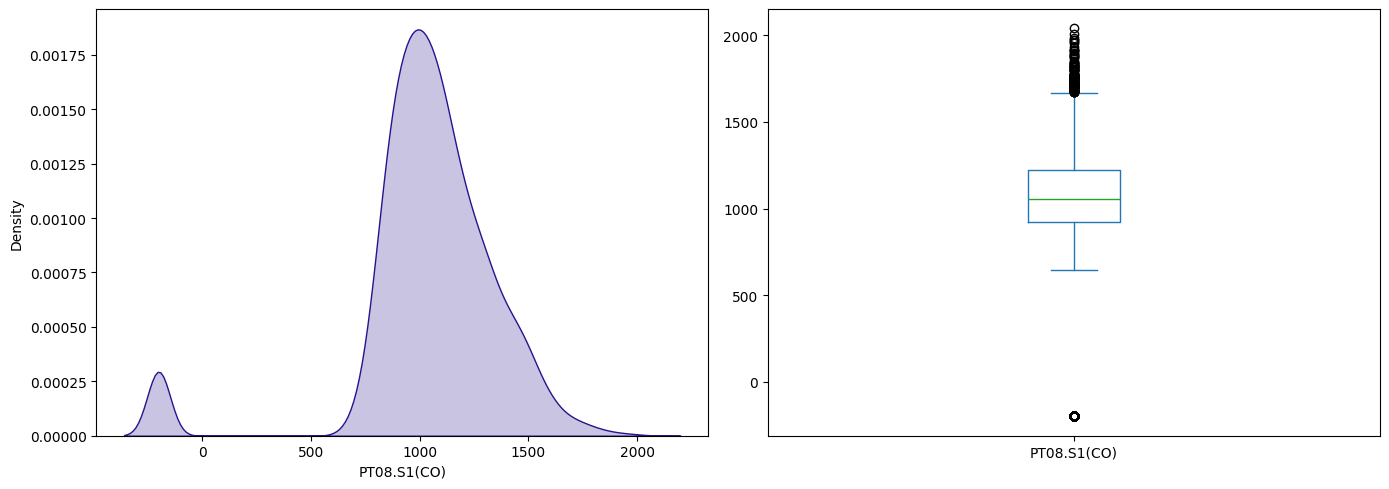

NMHC(GT)


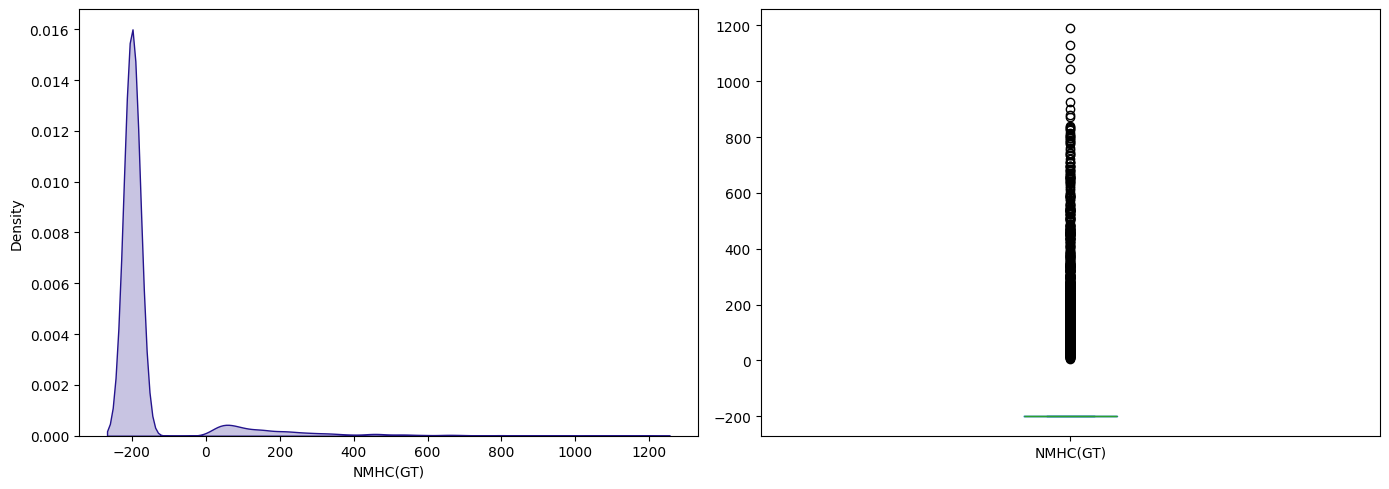

PT08.S2(NMHC)


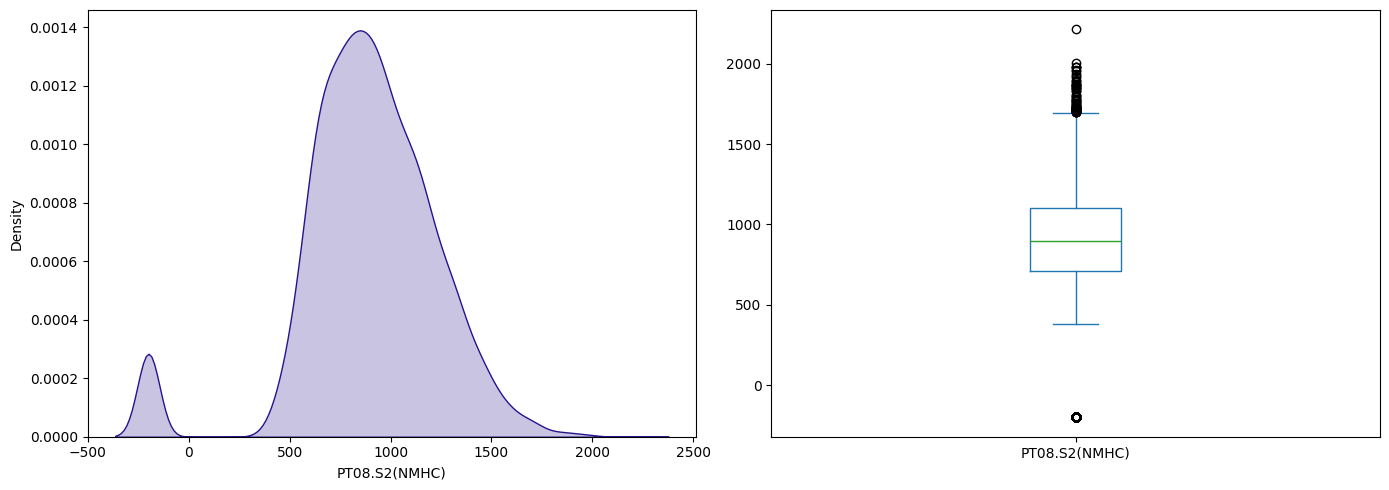

NOx(GT)


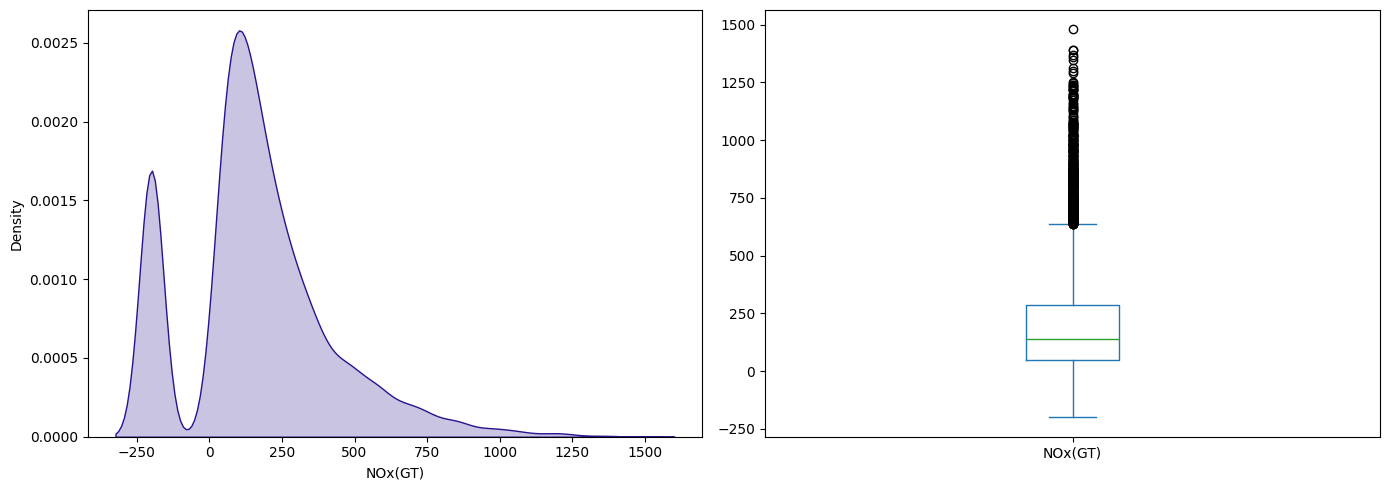

PT08.S3(NOx)


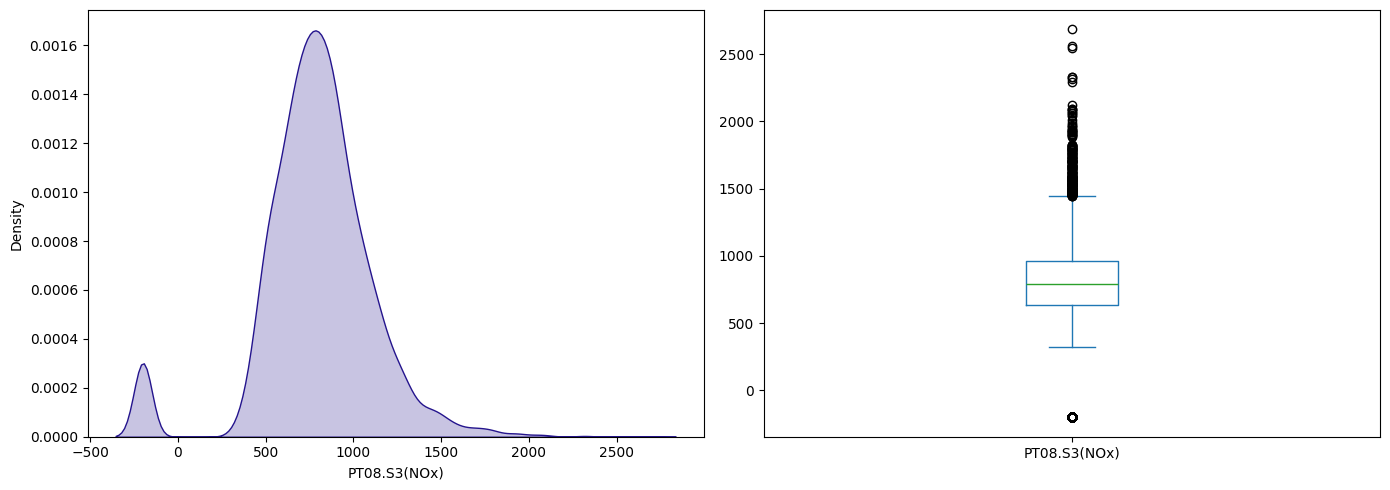

NO2(GT)


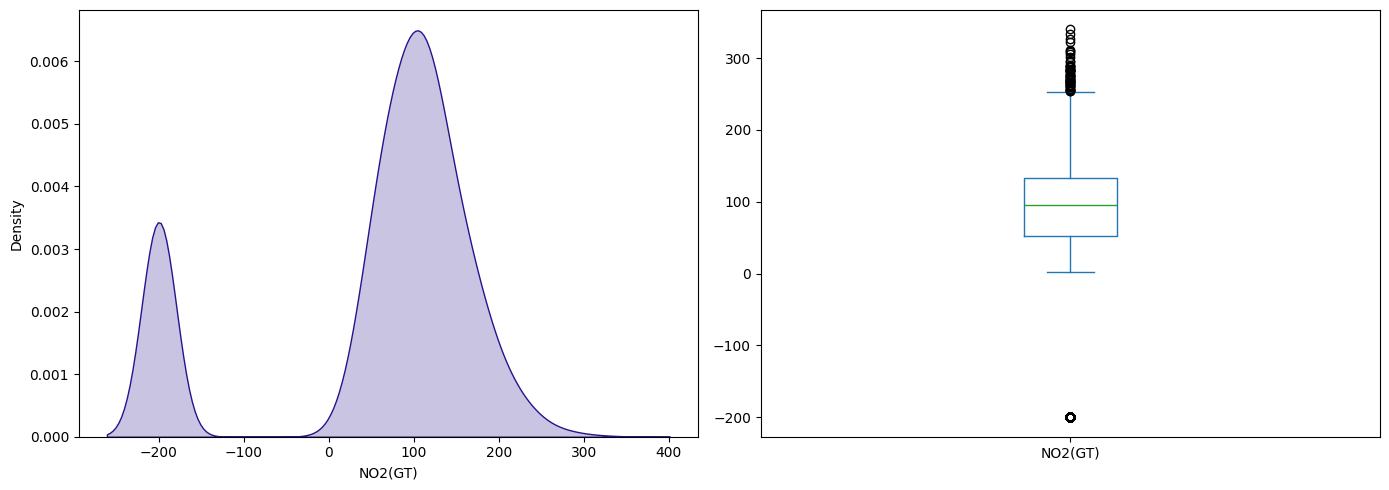

PT08.S4(NO2)


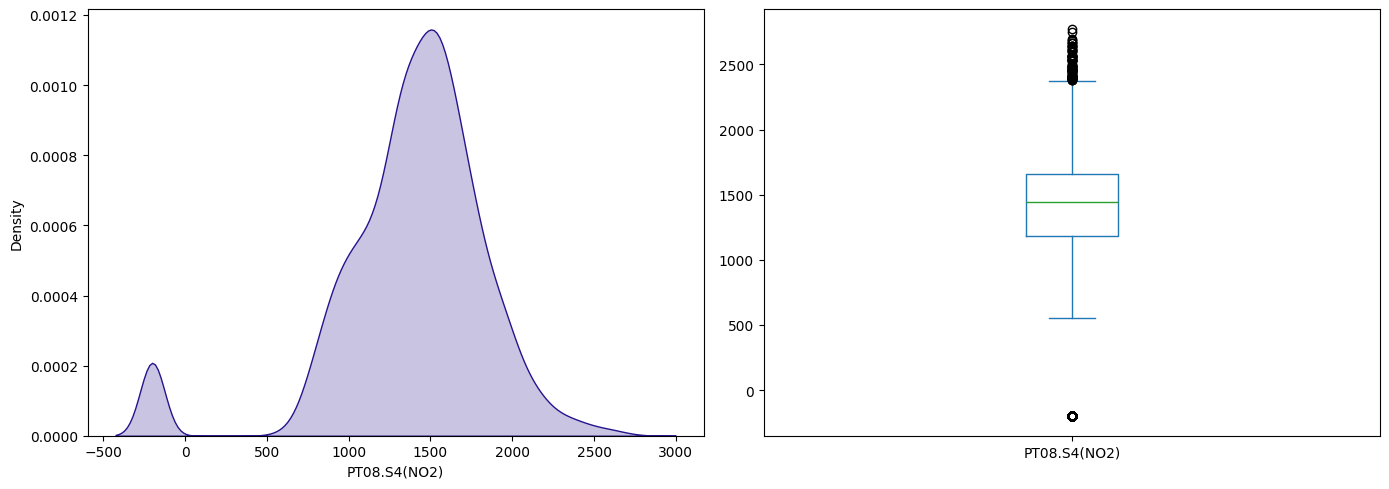

PT08.S5(O3)


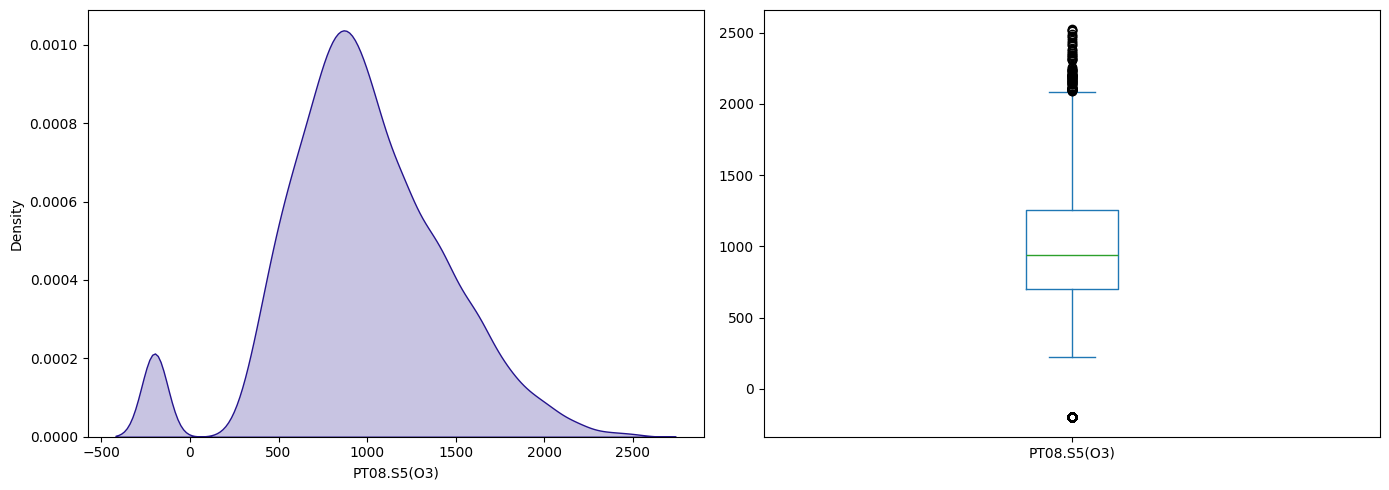

In [50]:
features = df_features.columns.tolist()

for each in features:
    if not pd.api.types.is_numeric_dtype(df_features[each]):
        continue

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    ax = sns.kdeplot(df_features[each], fill=True, color="#24148d")
    plt.ylabel('Density')
    plt.xlabel(each)
    plt.subplot(1, 2, 2)
    df_features[each].plot.box()
    plt.tight_layout()
    print(each)
    plt.show()


In [51]:
numeric_features = df[features].select_dtypes(include=['number'])
pd.DataFrame(data=[numeric_features.skew(), numeric_features.kurtosis()], index=['skewness', 'kurtosis']).round(2)

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
skewness,-1.72,4.08,-0.79,0.83,-0.38,-1.23,-1.24,-0.03
kurtosis,5.84,18.86,2.37,1.51,3.10,0.28,3.27,0.64


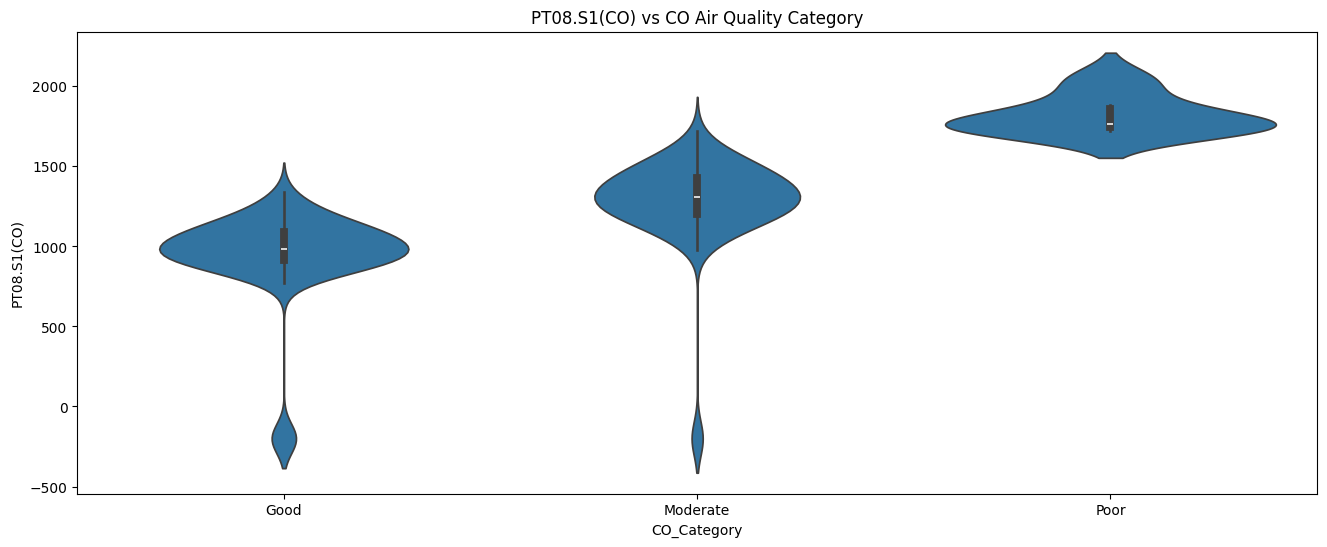

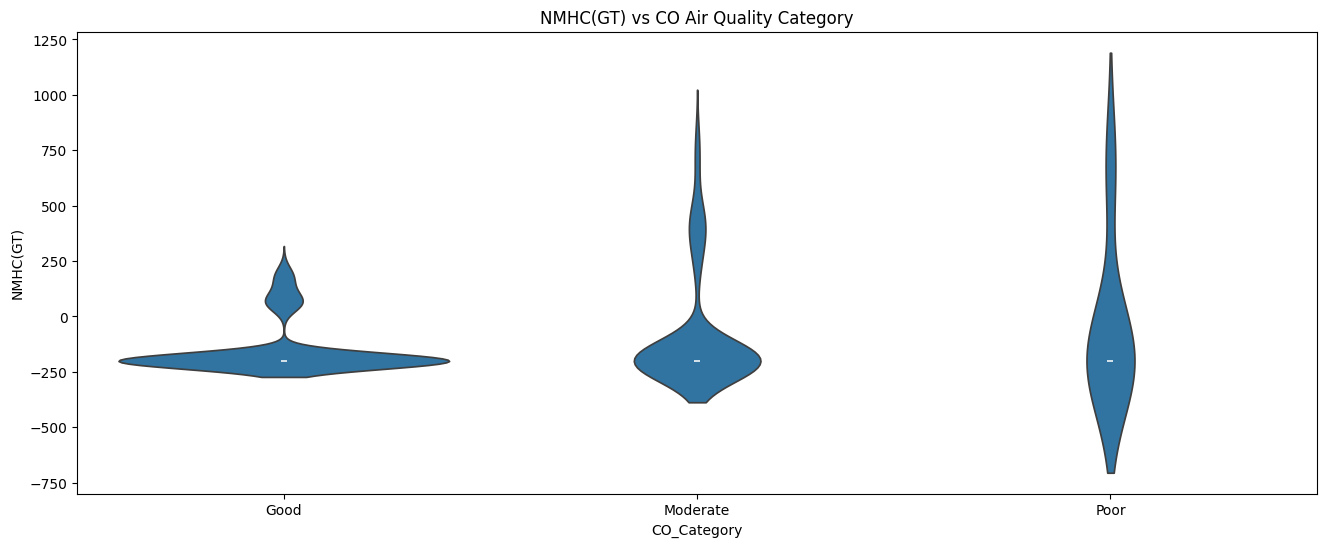

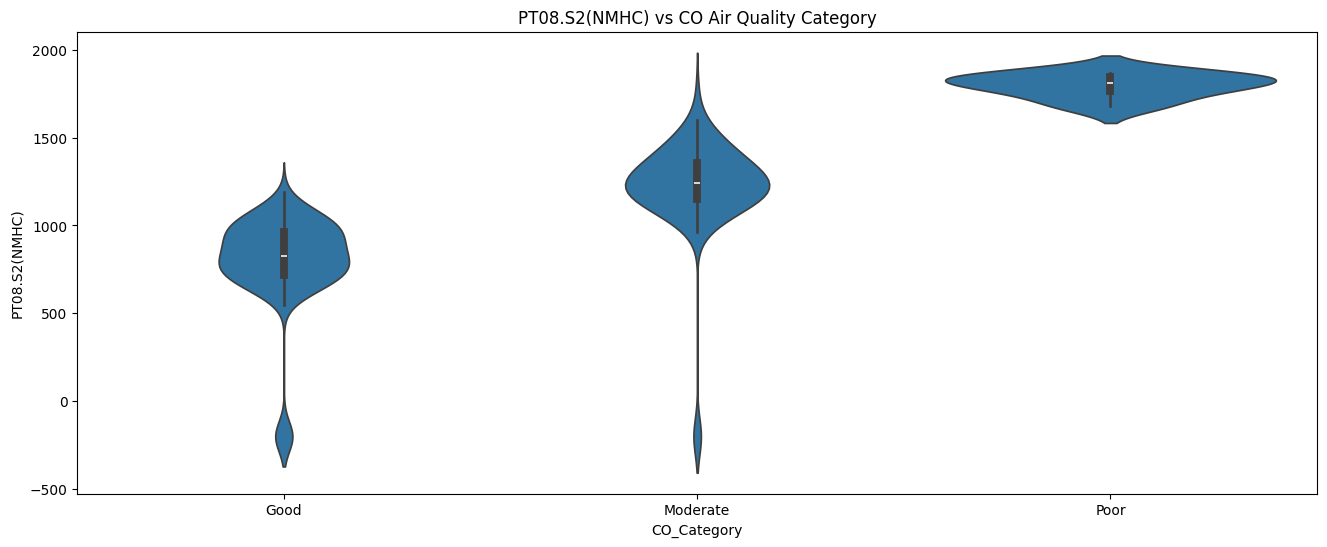

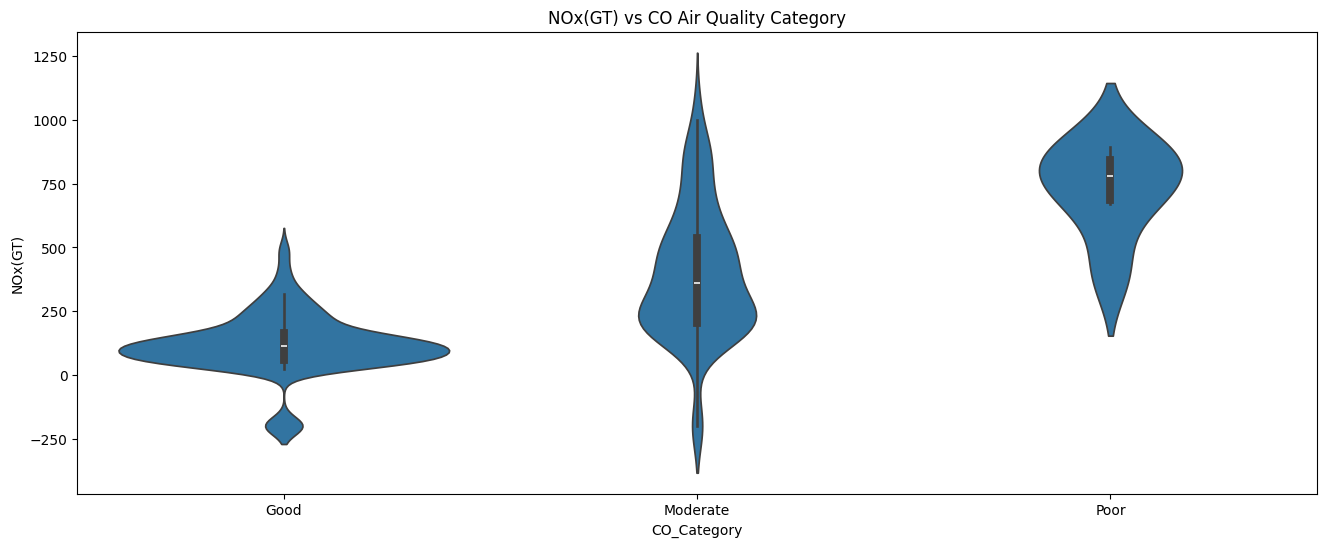

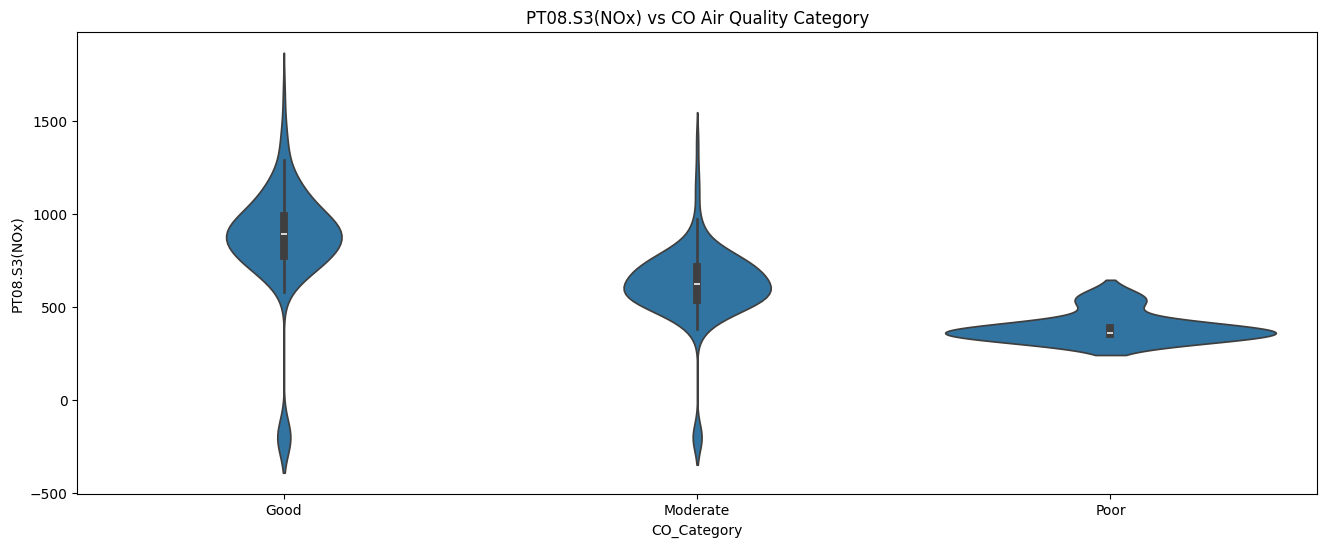

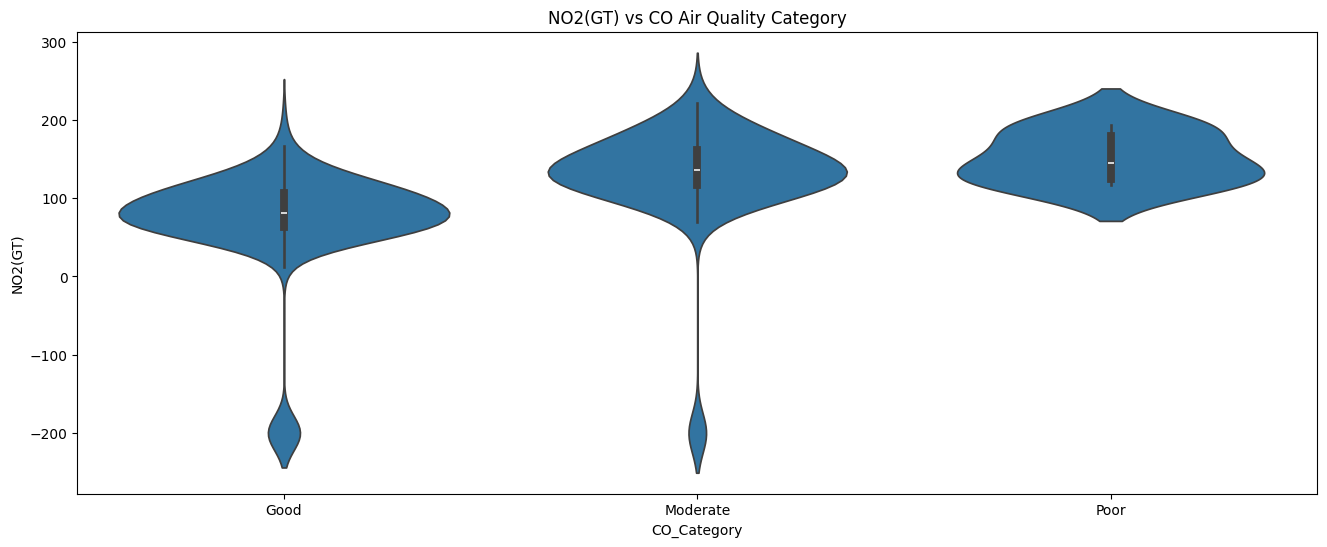

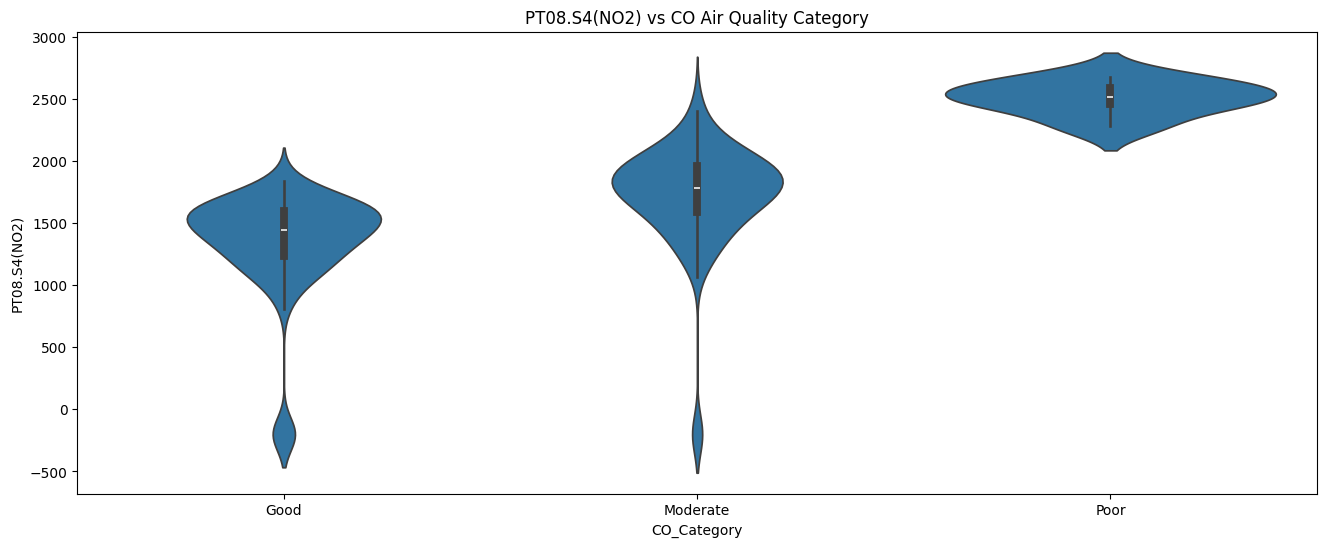

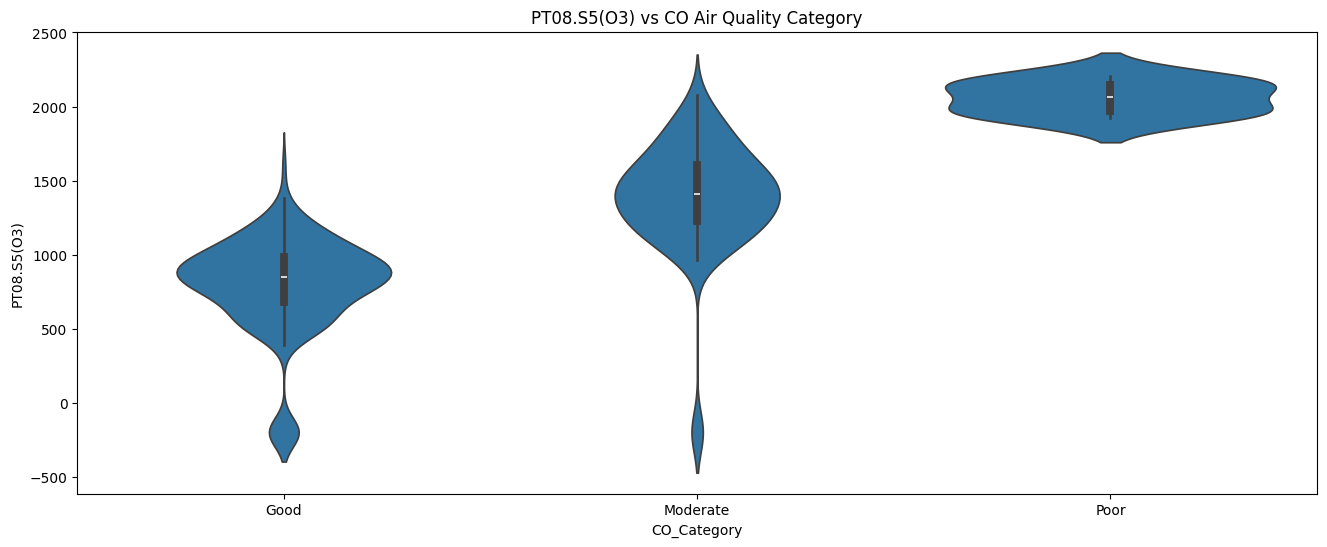

In [52]:
df['CO(GT)'] = df['CO(GT)'].replace(-200, np.nan)

# Convert to numeric (force any strings to NaN)
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'], errors='coerce')

# Now safely bin into categories
df['CO_Category'] = pd.cut(
    df['CO(GT)'],
    bins=[-1, 2, 6, 50],
    labels=['Good', 'Moderate', 'Poor']
)

for each in features:
    if not pd.api.types.is_numeric_dtype(df_features[each]):
        continue
    plt.figure(figsize=(16, 6))
    sns.violinplot(data=df, x='CO_Category', y=each)
    plt.title(f'{each} vs CO Air Quality Category')
    plt.show()


C:\Users\konum\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


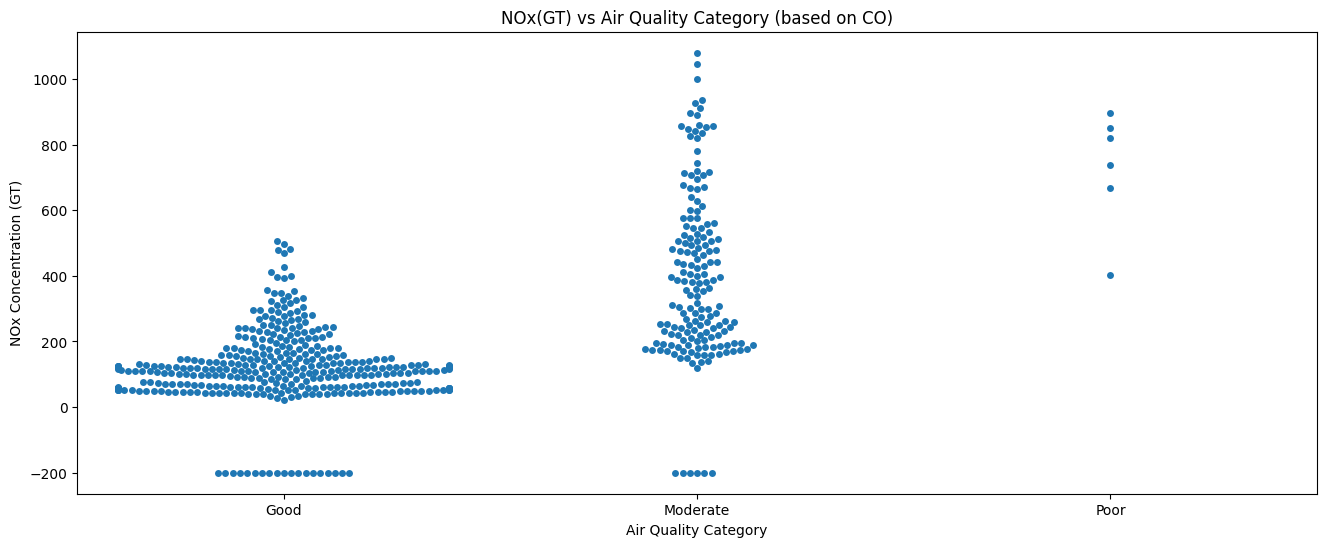

In [53]:
plt.figure(figsize=(16, 6))
sns.swarmplot(data=df, x='CO_Category', y='NOx(GT)')
plt.title("NOx(GT) vs Air Quality Category (based on CO)")
plt.xlabel("Air Quality Category")
plt.ylabel("NOx Concentration (GT)")
plt.show()

In [54]:
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'PT08.S5(O3)']
for col in pollutants:
    df[col] = df[col].astype(float)                       
average_pollutant_in_city= df.groupby('CO_Category')[pollutants].mean().reset_index()
display(average_pollutant_in_city)

ValueError: could not convert string to float: '11,9'

C:\Users\konum\AppData\Local\Temp\ipykernel_37996\3929386795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


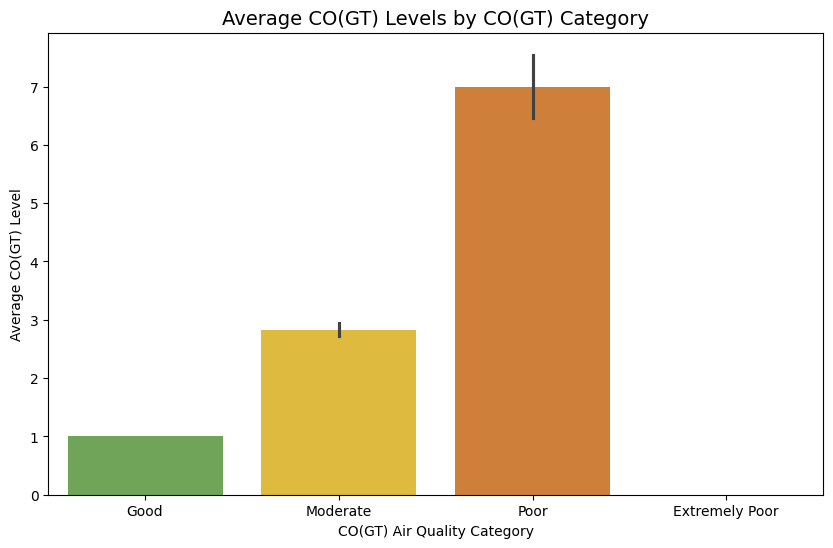

C:\Users\konum\AppData\Local\Temp\ipykernel_37996\3929386795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


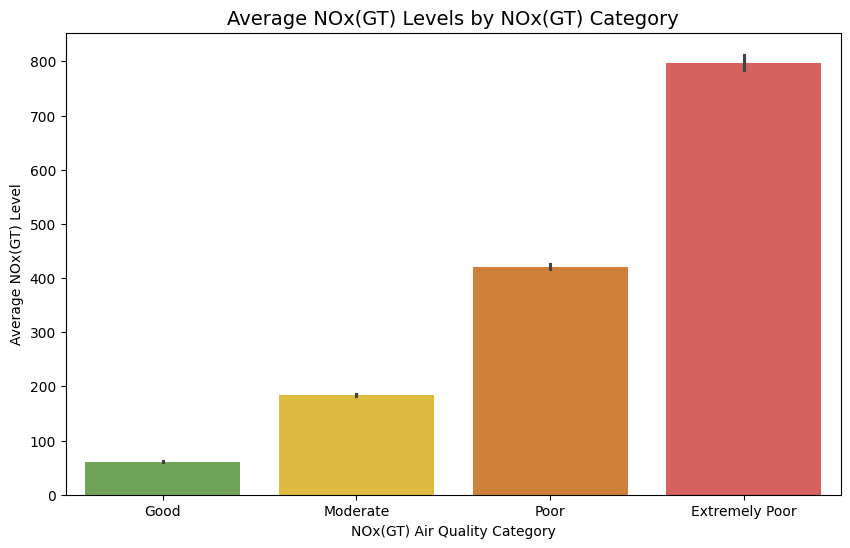

C:\Users\konum\AppData\Local\Temp\ipykernel_37996\3929386795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


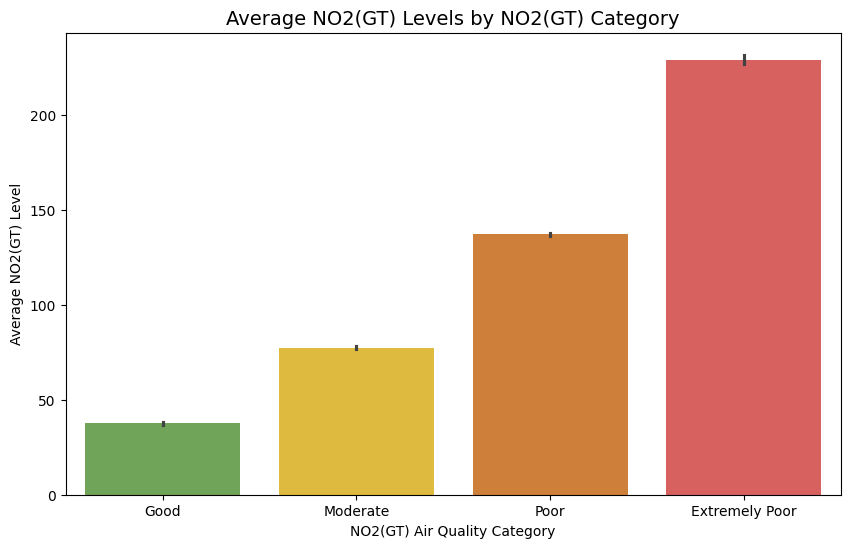

C:\Users\konum\AppData\Local\Temp\ipykernel_37996\3929386795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


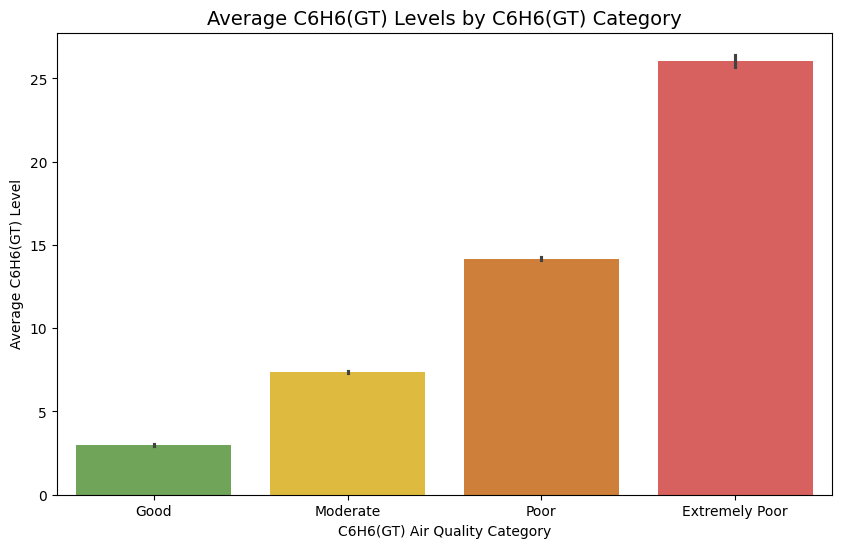

C:\Users\konum\AppData\Local\Temp\ipykernel_37996\3929386795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


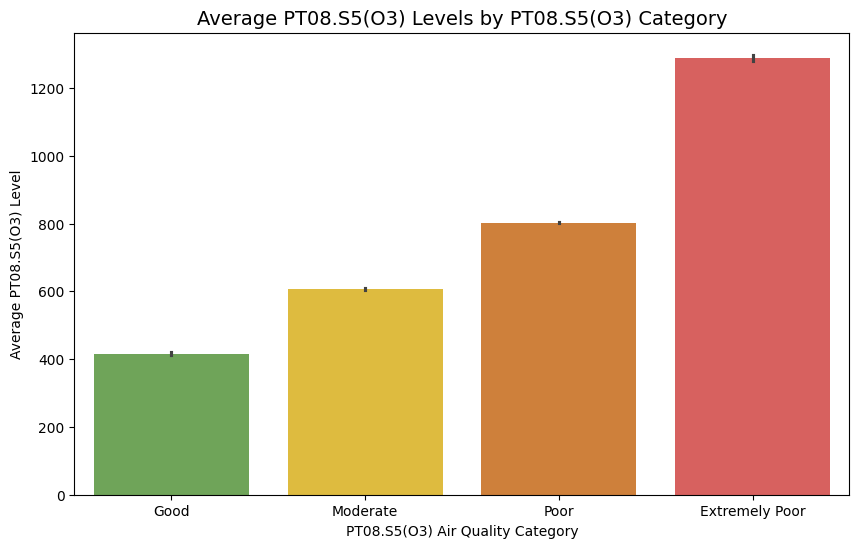

In [ ]:
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'PT08.S5(O3)']
category_order = ['Good', 'Moderate', 'Poor', 'Extremely Poor']

for p in pollutants:
    category_col = p + '_Category'
    plt.figure(figsize=(10,6))
    sns.barplot(data=df, x=category_col, y=p, order=category_order, palette=['#6ab04c', '#f9ca24', '#e67e22', '#eb4d4b']
    )
    plt.title(f'Average {p} Levels by {p} Category', fontsize=14)
    plt.xlabel(f'{p} Air Quality Category')
    plt.ylabel(f'Average {p} Level')
    plt.show()


In [ ]:
def categorize_pollutant(value, pollutant):
    if pd.isna(value) or value == -200:
        return 'Missing'

    # CO(GT): Carbon Monoxide (mg/m³)
    if pollutant == 'CO(GT)':
        if value <= 1:
            return 'Good'
        elif value <= 5:
            return 'Moderate'
        elif value <= 10:
            return 'Poor'
        else:
            return 'Extremely Poor'

    # NOx(GT): Nitrogen Oxides (ppb)
    elif pollutant == 'NOx(GT)':
        if value <= 100:
            return 'Good'
        elif value <= 300:
            return 'Moderate'
        elif value <= 600:
            return 'Poor'
        else:
            return 'Extremely Poor'

    # NO2(GT): Nitrogen Dioxide (µg/m³)
    elif pollutant == 'NO2(GT)':
        if value <= 50:
            return 'Good'
        elif value <= 100:
            return 'Moderate'
        elif value <= 200:
            return 'Poor'
        else:
            return 'Extremely Poor'

    # C6H6(GT): Benzene (µg/m³)
    elif pollutant == 'C6H6(GT)':
        if value <= 5:
            return 'Good'
        elif value <= 10:
            return 'Moderate'
        elif value <= 20:
            return 'Poor'
        else:
            return 'Extremely Poor'

    # PT08.S5(O3): Ozone sensor value (arbitrary units)
    elif pollutant == 'PT08.S5(O3)':
        if value <= 500:
            return 'Good'
        elif value <= 700:
            return 'Moderate'
        elif value <= 900:
            return 'Poor'
        else:
            return 'Extremely Poor'
                 
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'PT08.S5(O3)']
for col in pollutants:
    df[col] = (df[col]
        .astype(str)
        .str.replace(',', '.')  
        .replace('-200', None)              
        .astype(float))                       
    df[col+'_Category'] = df[col].apply(lambda x: categorize_pollutant(x, col))

df[['CO(GT)', 'CO(GT)_Category', 
    'NOx(GT)', 'NOx(GT)_Category',
    'NO2(GT)', 'NO2(GT)_Category',
    'C6H6(GT)', 'C6H6(GT)_Category',
    'PT08.S5(O3)', 'PT08.S5(O3)_Category']].head(10)

,CO(GT),CO(GT)_Category,NOx(GT),NOx(GT)_Category,NO2(GT),NO2(GT)_Category,C6H6(GT),C6H6(GT)_Category,PT08.S5(O3),PT08.S5(O3)_Category
0,NaN,Missing,166.0,Moderate,113.0,Poor,11.9,Poor,1268.0,Extremely Poor
1,2.0,Moderate,103.0,Moderate,92.0,Moderate,9.4,Moderate,972.0,Extremely Poor
2,NaN,Missing,131.0,Moderate,114.0,Poor,9.0,Moderate,1074.0,Extremely Poor
3,NaN,Missing,172.0,Moderate,122.0,Poor,9.2,Moderate,1203.0,Extremely Poor
4,NaN,Missing,131.0,Moderate,116.0,Poor,6.5,Moderate,1110.0,Extremely Poor
5,NaN,Missing,89.0,Good,96.0,Moderate,4.7,Good,949.0,Extremely Poor
6,NaN,Missing,62.0,Good,77.0,Moderate,3.6,Good,733.0,Poor
7,1.0,Good,62.0,Good,76.0,Moderate,3.3,Good,730.0,Poor
8,NaN,Missing,45.0,Good,60.0,Moderate,2.3,Good,620.0,Moderate
9,NaN,Missing,-200.0,Missing,-200.0,Missing,1.7,Good,501.0,Moderate


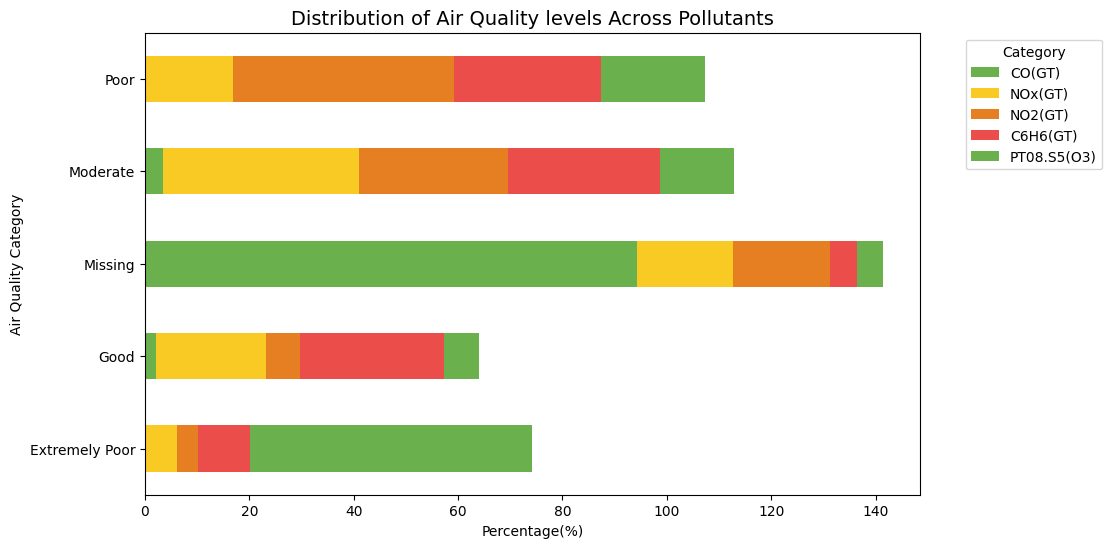

In [ ]:

pollutant_categories = [p + '_Category' for p in pollutants]

category_counts = pd.DataFrame({
    p: df[p + '_Category'].value_counts(normalize=True) * 100 for p in pollutants
}).fillna(0)

category_counts.plot.barh(
    stacked=True,
    color=['#6ab04c', '#f9ca24', '#e67e22', '#eb4d4b'],
    figsize=(10, 6)
)
plt.title(f"Distribution of Air Quality levels Across Pollutants", fontsize=14)
plt.xlabel('Percentage(%)')
plt.ylabel('Air Quality Category')
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

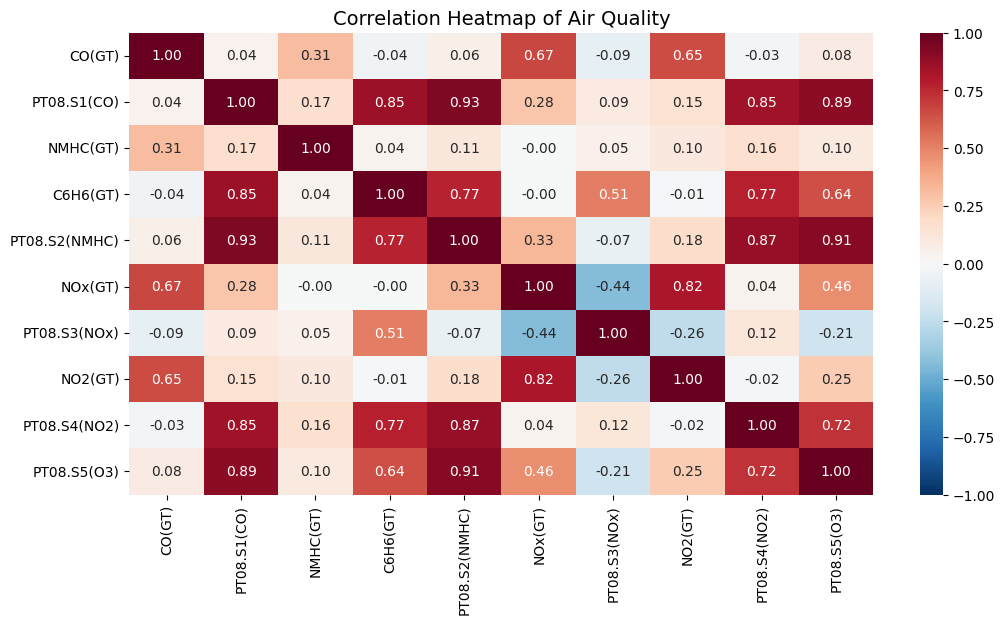

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Air Quality', fontsize=14)
plt.show()


In [ ]:
df_label = df['CO_Category']

df_features = df[['NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'PT08.S5(O3)', 'T', 'RH', 'AH']].copy()

for col in df_features.columns:
    df_features[col] = (
        df_features[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .replace('-200', None)
        .astype(float)
    )

df_features = df_features.fillna(df_features.mean())
df_label = df_label.fillna(df_label.mode()[0])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_features, df_label, test_size=0.2)

In [ ]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

7576 7576
1895 1895


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(class_weight='balanced', max_iter=1000)
logisticRegression.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
logisticRegression.score(X_test, y_test)

0.7192612137203166

In [ ]:
from sklearn import svm
SVM = svm.SVC(class_weight='balanced')
SVM.fit(X_train, y_train)
SVM.score(X_test, y_test)

0.6649076517150396

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(class_weight='balanced')
SGD.fit(X_train, y_train)
SGD.score(X_test, y_test)

0.8638522427440634

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB.score(X_test, y_test)


0.9678100263852243

In [ ]:
from sklearn import tree
decisionTree = tree.DecisionTreeClassifier(class_weight='balanced', random_state=42)
decisionTree.fit(X_train, y_train)
decisionTree.score(X_test, y_test)

0.9651715039577836

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, decisionTree.predict(X_test)))
print(classification_report(y_test, GNB.predict(X_test)))
print(classification_report(y_test, SGD.predict(X_test)))
print(classification_report(y_test, SVM.predict(X_test)))
print("Logistic Regression:\n", classification_report(y_test, logisticRegression.predict(X_test)))


              precision    recall  f1-score   support

        Good       0.98      0.98      0.98      1857
    Moderate       0.06      0.05      0.06        37
        Poor       0.50      1.00      0.67         1

    accuracy                           0.97      1895
   macro avg       0.51      0.68      0.57      1895
weighted avg       0.96      0.97      0.96      1895

              precision    recall  f1-score   support

        Good       0.98      0.99      0.98      1857
    Moderate       0.12      0.08      0.10        37
        Poor       0.20      1.00      0.33         1

    accuracy                           0.97      1895
   macro avg       0.43      0.69      0.47      1895
weighted avg       0.96      0.97      0.97      1895

              precision    recall  f1-score   support

        Good       0.99      0.88      0.93      1857
    Moderate       0.08      0.03      0.04        37
        Poor       0.00      1.00      0.01         1

    accuracy        

In [55]:
import joblib

joblib.dump(logisticRegression, "models/LogisticRegression.pkl")
joblib.dump(SVM, "models/SVM.pkl")
joblib.dump(SGD, "models/SGD.pkl")
joblib.dump(GNB, "models/GNB.pkl")
joblib.dump(decisionTree, "models/DecisionTree.pkl")

['models/DecisionTree.pkl']